# Bessel galaxy distribution - Inverse Transform Sampling

In [1]:
from numpy import array, empty, random, sqrt, exp, pi, sin, cos, arctan, zeros, save, load, cross, dot, ones, linspace
from mpl_toolkits.mplot3d import Axes3D
import scipy.integrate as integrate
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from numpy.linalg import norm
from copy import deepcopy
from scipy.special import kv, iv

In [2]:
def func(x,Distribution,Point): 
    """--------------------------------------------------------------
    Equation that follows the point of a wanted distribution that 
    matches the random one of a uniform distribution
    -----------------------------------------------------------------
       x            : Random variable in a distribution (unkonwn)
       Distribution : Distribution's function
       Point        : Random variable in the uniform distribution
    --------------------------------------------------------------"""
    return integrate.quad(Distribution,0,x)[0]-Point

In [3]:
def Random_numbers_distribution(f, N, x0 = 0.001, normal = False, args = None):
    """---------------------------------------
    Creates an array of N random numbers with
    a distribution density equal to f. 
    --------------------------------------"""
    if normal == False:
        norm = integrate.quad(f,0,1)[0]
        uf = lambda x: f(x)/norm #Density function with integral=1
    Uniform = random.random(N)
    Map = zeros(N)
    for ii in range(N):
        Map[ii]=fsolve(func,x0,args=(uf,Uniform[ii]))
    return Map

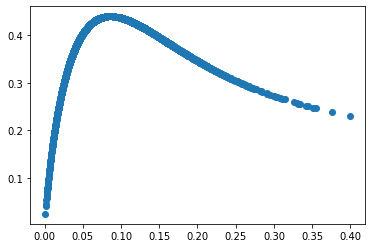

In [4]:
"""Personalized distribution"""
random.seed(10)
N = 5000
# Random masses varies between min_mass mass and max_mass solar masses
status = ones(N) 
#Parameters of the model of density of starts
init_r = 0.4 # Initial radius
Rd = .1 
#Model of density normalized
f = lambda x: x*exp(-x/Rd) 
#Empty array for the points mapped from the uniform distribution
Map = Random_numbers_distribution(f,N, args=(init_r,Rd))*init_r
Rd *= init_r
Vel = zeros(N)
center = [0.5, 0.5, 0.5] # Origin of galaxy  
for i in range(N):
        # Keplerina velocity in the plain of the disc
        y = Map[i] / (2*Rd) 
        Bessel_v = sqrt(y**2*(iv(0,y)*kv(0,y)-iv(1,y)*kv(1,y)))
        Vel[i] = Bessel_v
plt.scatter(Map,Vel)
plt.show()

In [5]:
M = sum(status)
sigma = M/(4*pi*(Rd**2-(init_r**2+init_r*Rd)*exp(-init_r/Rd)))
sigma

249927.735762511

In [6]:
f= lambda r: 4*pi*sigma*r*exp(-r/Rd)
integrate.quad(f,0,init_r)[0]

5022.585758335055

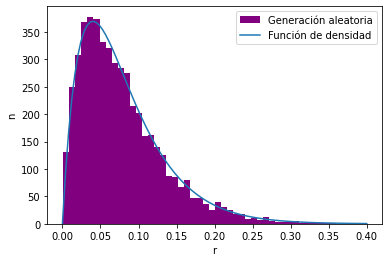

In [7]:
b = 50
x = linspace(0,init_r,100)
plt.hist(Map, bins = b, color = "purple", label = "Generación aleatoria")
plt.plot(x,4*pi*sigma*x*exp(-x/Rd)/(b)*init_r, label = "Función de densidad")
plt.xlabel("r")
plt.ylabel("n")
plt.legend()
plt.show() 

# Galaxy with Bulge and Disc

In [8]:
N = 1000

In [9]:
random.seed(100)
#Initial radius
init_r = .4
# Random masses varies between min_mass mass and max_mass solar masses
masses = ones(N)
#Parameters of the model of density of starts
const_bulb=2.5
const_disc=.2
bulb_radius=0.2
#Model of density normalized
f1 = lambda x: exp(-(x)**(1/4)/const_bulb)        #Bulge
f2 = lambda x: f1(bulb_radius)*exp(-(x-bulb_radius)/const_disc) #Disc
f = lambda x:  x*f1(x) if x<bulb_radius else x*f2(x)                #Piecewise                                     
Map = Random_numbers_distribution(f,N,args=(init_r,Rd))*init_r

In [10]:
const_bulb=2.5*(init_r**(1/4))
const_disc=.2*init_r
bulb_radius=0.2*init_r
g1 = lambda x: exp(-(x)**(1/4)/const_bulb)        #Bulge
g2 = lambda x: g1(bulb_radius)*exp(-(x-bulb_radius)/const_disc) #Disc
g = lambda x:  x*g1(x) if x<bulb_radius else x*g2(x)                #Piecewise 
M = sum(masses)
sigma = M/(integrate.quad(g,0,init_r)[0])

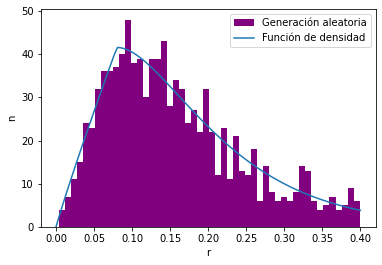

In [11]:
b = 50
x = linspace(0,init_r,100)
y = zeros(100)
for ii in range(100):
    y[ii] = g(x[ii])
plt.hist(Map, bins = b, color = "purple", label = "Generación aleatoria")
plt.plot(x,sigma*y/b*init_r, label = "Función de densidad")
plt.xlabel("r")
plt.ylabel("n")
plt.legend()
plt.show() 